## Linear Regression

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 1. Load & Visualize the data

In [3]:
# Load
X = pd.read_csv("Training Data/Linear_X_Train.csv")
Y = pd.read_csv("Training Data/Linear_Y_Train.csv")

# convert to Numpy arrays
X = X.values
Y = Y.values

# Normalization
u = X.mean()
std = X.std()
X = (X - u)/std

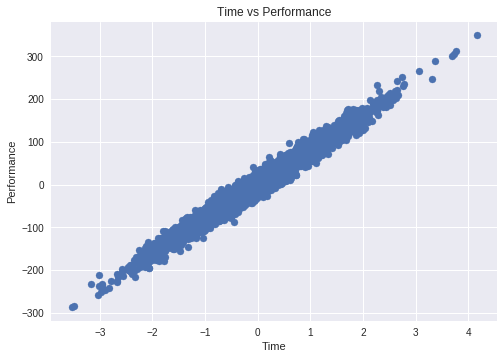

In [4]:
# Visulaize
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.title("Time vs Performance")
plt.xlabel("Time")
plt.ylabel("Performance")
plt.show()

### 2. Applying Linear Regression

In [5]:
def hypothesis(x,theta):
    # theta = [theta0, theta1]
    y = theta[0] + theta[1]*x
    return y

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m

def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        # Compute Gradient
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        # update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta, error_list, theta_list

In [6]:
theta, error_list, theta_list = gradientDescent(X,Y)

In [7]:
theta

array([ 0.6838508 , 79.90361453])

In [8]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

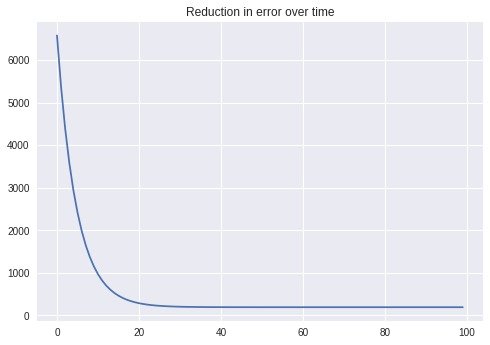

In [9]:
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.show()

### 3. Predictions & Best fit line

In [10]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


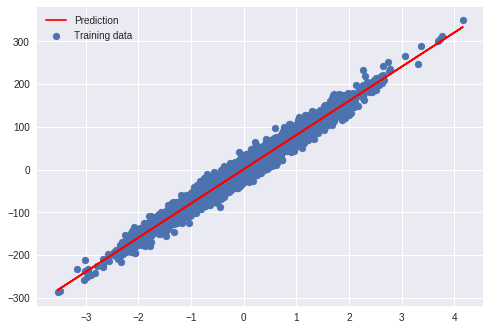

In [11]:
# Plot training data & predictions
plt.scatter(X,Y,label="Training data")
plt.plot(X,y_,color='red',label='Prediction')
plt.legend()
plt.show()

In [12]:
# Loading the test data
X_test = pd.read_csv("Test Cases/Linear_X_Test.csv").values
Y_test = hypothesis(X_test,theta)
Y_test.shape

(1250, 1)

In [13]:
df  = pd.DataFrame(data=Y_test,columns=['y'])
df.to_csv('y_prediction.csv',index=False)

### 4. Computing Score
 R2 (R-squared) / Coefficient of Determination

In [14]:
def r2_score(Y,Y_):
    num = np.sum((Y - Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = 1 - num/denom
    return score * 100

In [15]:
print(r2_score(Y,y_))

97.09612226971643


### 5. Visualising Loss function, Gradient Descent & Theta updates

In [16]:
theta

array([ 0.6838508 , 79.90361453])

In [17]:
T0 = np.arange(-80,80,1)
T1 = np.arange(0,160,1)
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y - y_)**2)/Y.shape[0]

print(J.shape)

(160, 160)


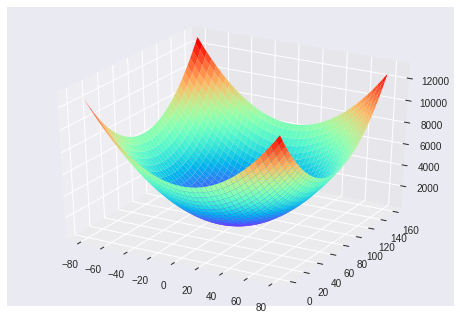

In [18]:
# Visualize the loss function
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

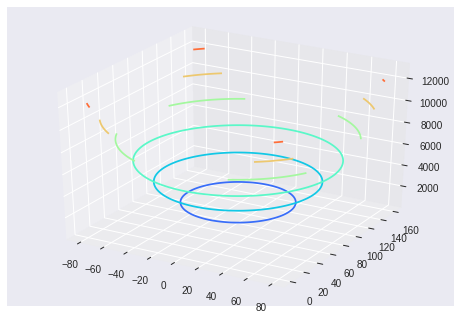

In [19]:
# Countour plot
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

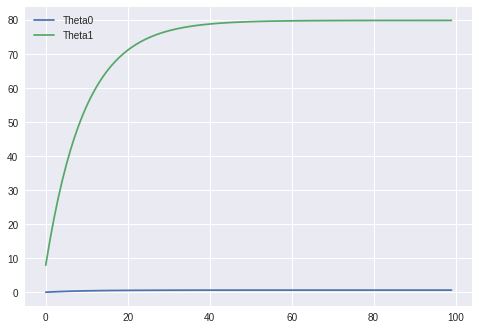

In [20]:
# Plot changes in values of theta
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

#### Trajectory traced by theta updates in Loss Function


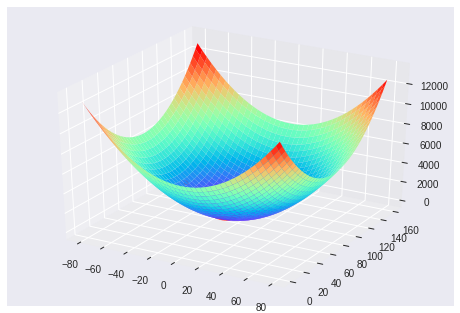

In [21]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,color='red')
plt.show()

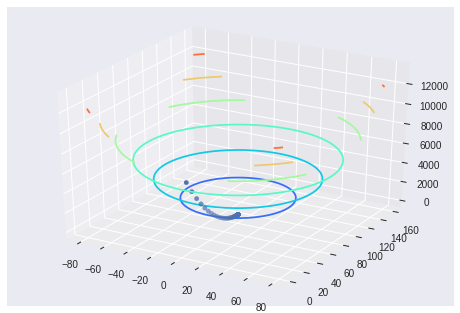

In [22]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

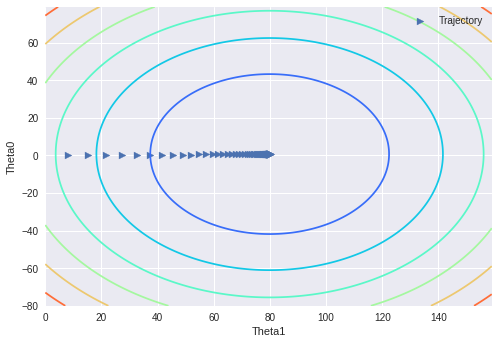

In [23]:
# 2D Contour Plot
plt.contour(T1,T0,J,cmap="rainbow")
plt.xlabel("Theta1")
plt.ylabel("Theta0")
plt.scatter(theta_list[:,1],theta_list[:,0],marker='>',label='Trajectory')
plt.legend()
plt.show()

In [24]:
# Save the theta in file
np.save("ThetaList.npy",theta_list)